국내 증시 KOSPI, KOSDAQ 분석하기
--

1. 코스피, 코스닥 지수를 산출하기
2. 외국인 투자 흐름 파악

In [74]:
# 01. 모듈 가져오기
import bs4
import numpy as np
import pandas as pd
import requests
import FinanceDataReader as fdr
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from pykrx import stock
from pykrx import bond
from datetime import datetime
from bs4 import BeautifulSoup

In [75]:
# 코스피 지수 데이터를 2003년부터 2023년까지 가져오기
kospi_data = fdr.DataReader('KS11', '2003-01-01', '2023-12-31')

print(kospi_data)

               Open     High      Low    Close      Volume  Change  UpDown  \
Date                                                                         
2003-01-02   633.03   637.10   623.75   635.17   742864455  0.0121       1   
2003-01-03   651.59   662.40   649.62   661.10  1005749532  0.0408       1   
2003-01-06   665.10   667.71   657.61   666.71   721798375  0.0085       1   
2003-01-07   679.00   679.30   652.14   652.20   690116512 -0.0218       2   
2003-01-08   655.97   660.39   650.93   651.72   604873252 -0.0007       2   
...             ...      ...      ...      ...         ...     ...     ...   
2023-12-21  2598.37  2610.81  2587.16  2600.02   578334789 -0.0055       2   
2023-12-22  2617.72  2621.37  2599.51  2599.51   465967201 -0.0002       2   
2023-12-26  2609.44  2612.14  2594.65  2602.59   440428129  0.0012       1   
2023-12-27  2599.35  2613.50  2590.08  2613.50   349733378  0.0042       1   
2023-12-28  2616.27  2655.28  2611.72  2655.28   460086621  0.01

In [76]:
# 종가 데이터 가져오기
kospi_close = kospi_data['Close']

# 거래대금만 가져오기
kospi_volume = kospi_data['Volume']

# 종가, 거래대금만 가져오기
kospi_name = kospi_data[['Close', 'Volume']]

print(kospi_name)

              Close      Volume
Date                           
2003-01-02   635.17   742864455
2003-01-03   661.10  1005749532
2003-01-06   666.71   721798375
2003-01-07   652.20   690116512
2003-01-08   651.72   604873252
...             ...         ...
2023-12-21  2600.02   578334789
2023-12-22  2599.51   465967201
2023-12-26  2602.59   440428129
2023-12-27  2613.50   349733378
2023-12-28  2655.28   460086621

[5192 rows x 2 columns]


In [77]:
# 조정된 리스트를 사용하여 DataFrame 생성
kospi_df = pd.DataFrame({
    'Close': kospi_close,
    'Volume': kospi_volume,
})

kospi_df

,Close,Volume
Date,,
2003-01-02,635.17,742864455
2003-01-03,661.10,1005749532
2003-01-06,666.71,721798375
2003-01-07,652.20,690116512
2003-01-08,651.72,604873252
...,...,...
2023-12-21,2600.02,578334789
2023-12-22,2599.51,465967201
2023-12-26,2602.59,440428129


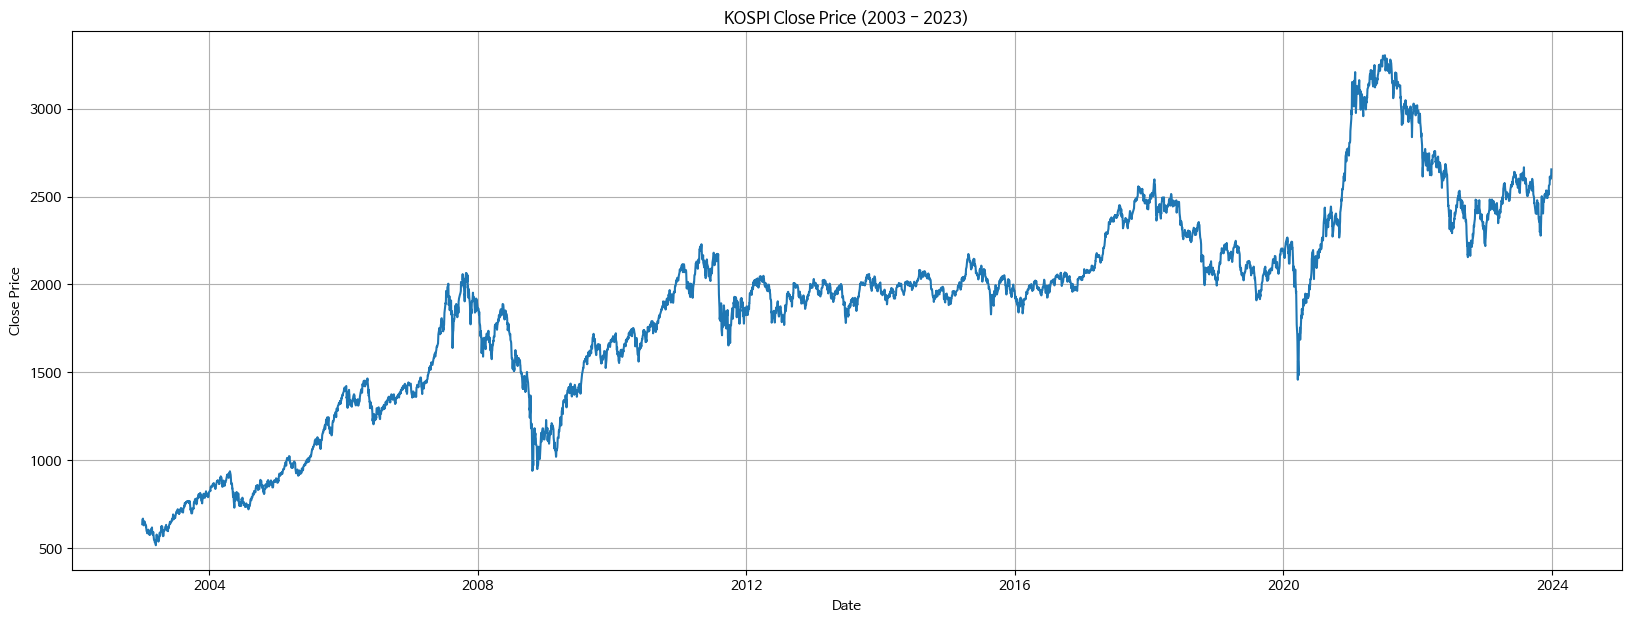

In [78]:
# 코스피 종가 데이터 시각화
plt.figure(figsize=(20, 7))  # 그래프 크기 설정
plt.plot(kospi_close)        # 코스피 종가 데이터 플롯
plt.title('KOSPI Close Price (2003 - 2023)')  # 그래프 제목 설정
plt.xlabel('Date')           # x축 레이블 설정
plt.ylabel('Close Price')    # y축 레이블 설정
plt.grid(True)
plt.show()                   # 그래프 보여주기

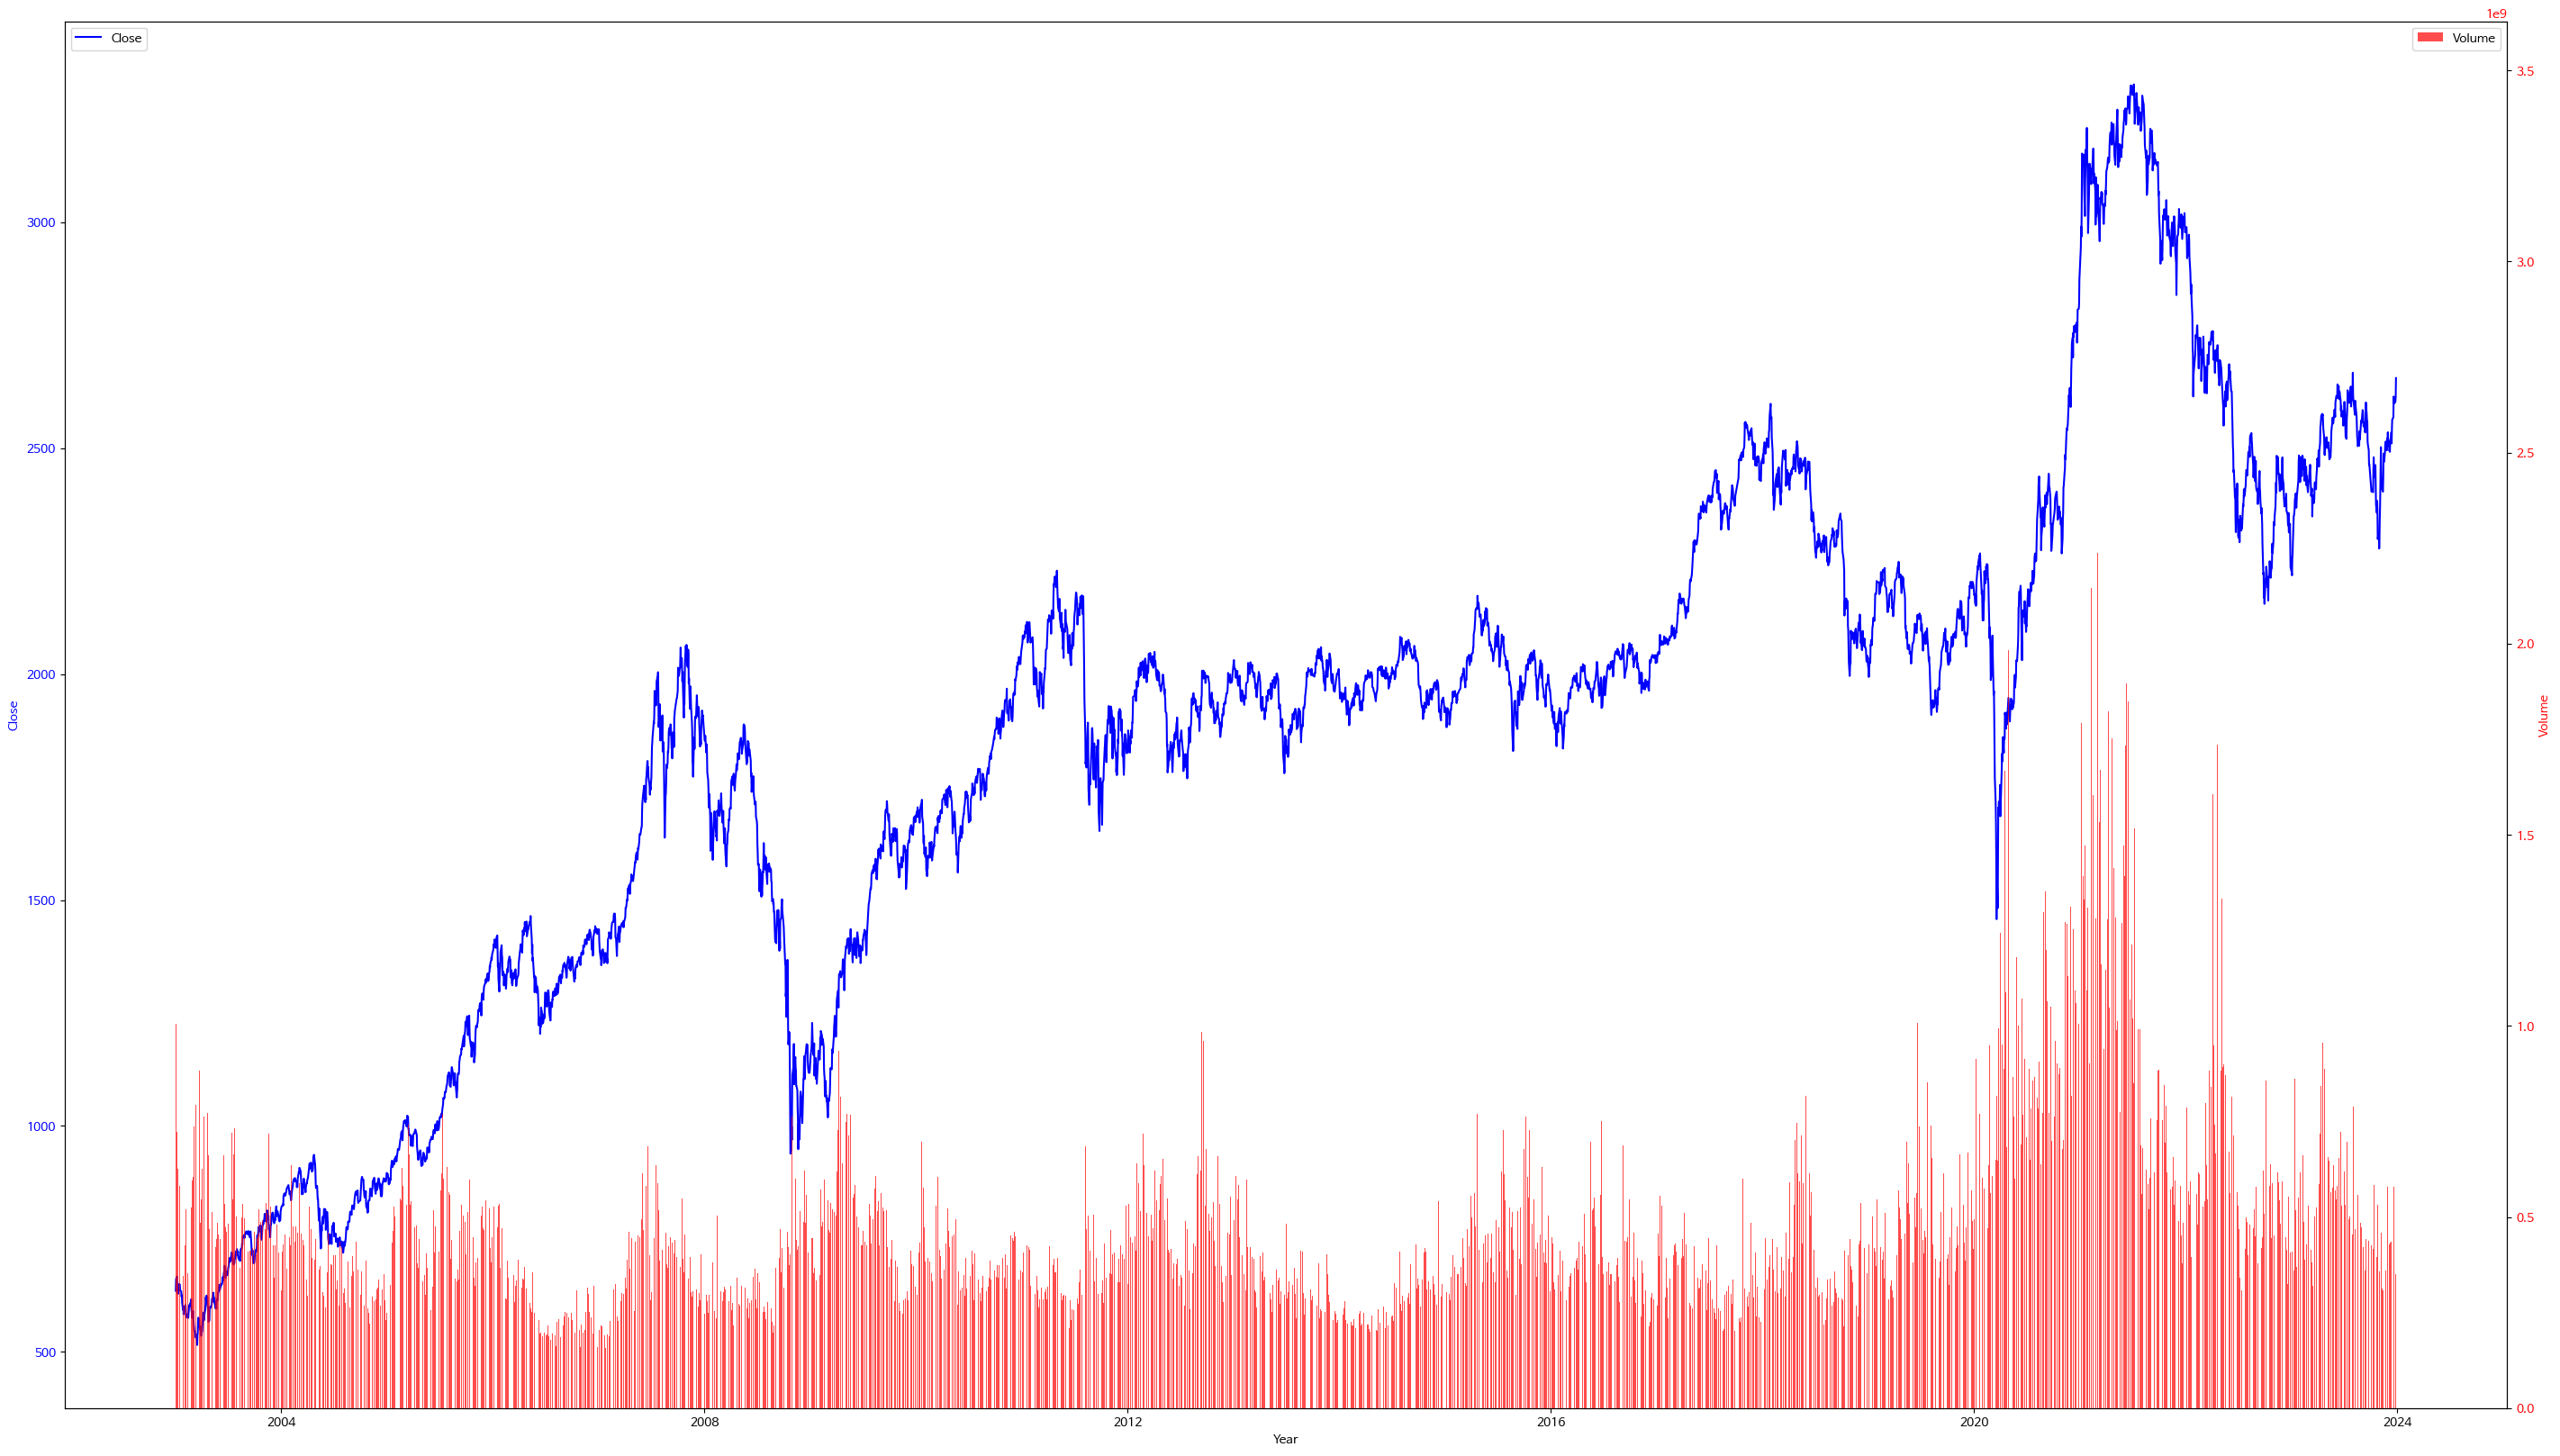

In [79]:
# 시각화 설정
plt.figure(figsize=(35, 20))

# 종가 데이터에 대한 선 그래프
plt.plot(kospi_close, color='blue', label='Close')
plt.xlabel('Year')
plt.ylabel('Close', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')

# 거래량 데이터에 대한 막대 그래프
plt.twinx()  # 새로운 y축 생성
plt.bar(kospi_data.index, kospi_volume, color='red', alpha=0.7, label='Volume')
plt.ylabel('Volume', color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')

plt.show()

In [80]:
# 코스닥 지수 데이터를 2003년부터 2023년까지 가져오기
kosdaq_data = fdr.DataReader('KQ11', '2003-01-01', '2023-12-31')

print(kosdaq_data)

              Open    High     Low   Close      Volume  Change  UpDown   Comp  \
Date                                                                            
2003-01-02  448.30  466.70  448.30  466.00   246620087  0.0505       1  22.40   
2003-01-03  478.60  486.30  478.60  483.40   341822258  0.0373       1  17.40   
2003-01-06  487.70  488.10  479.10  487.30   322699592  0.0081       1   3.90   
2003-01-07  497.20  497.90  476.80  476.80   378405176 -0.0215       2 -10.50   
2003-01-08  478.80  485.80  478.80  481.60   357180469  0.0101       1   4.80   
...            ...     ...     ...     ...         ...     ...     ...    ...   
2023-12-21  855.76  867.33  851.82  859.44  1145618422 -0.0041       2  -3.54   
2023-12-22  863.35  864.79  853.49  854.62  1212763839 -0.0056       2  -4.82   
2023-12-26  855.75  857.24  846.32  848.34  1078585688 -0.0073       2  -6.28   
2023-12-27  851.49  860.29  851.21  859.79  1221463001  0.0135       1  11.45   
2023-12-28  860.42  866.57  

In [81]:
# 종가 데이터 가져오기
kosdaq_close = kosdaq_data['Close']

# 거래대금만 가져오기
kosdaq_volume = kosdaq_data['Volume']

# 종가, 거래대금만 가져오기
kosdaq_name = kosdaq_data[['Close', 'Volume']]

print(kosdaq_name)

             Close      Volume
Date                          
2003-01-02  466.00   246620087
2003-01-03  483.40   341822258
2003-01-06  487.30   322699592
2003-01-07  476.80   378405176
2003-01-08  481.60   357180469
...            ...         ...
2023-12-21  859.44  1145618422
2023-12-22  854.62  1212763839
2023-12-26  848.34  1078585688
2023-12-27  859.79  1221463001
2023-12-28  866.57  1251153574

[5192 rows x 2 columns]


In [82]:
# 조정된 리스트를 사용하여 DataFrame 생성
kosdaq_df = pd.DataFrame({
    'Close': kosdaq_close,
    'Volume': kosdaq_volume,
})

kosdaq_df

,Close,Volume
Date,,
2003-01-02,466.00,246620087
2003-01-03,483.40,341822258
2003-01-06,487.30,322699592
2003-01-07,476.80,378405176
2003-01-08,481.60,357180469
...,...,...
2023-12-21,859.44,1145618422
2023-12-22,854.62,1212763839
2023-12-26,848.34,1078585688


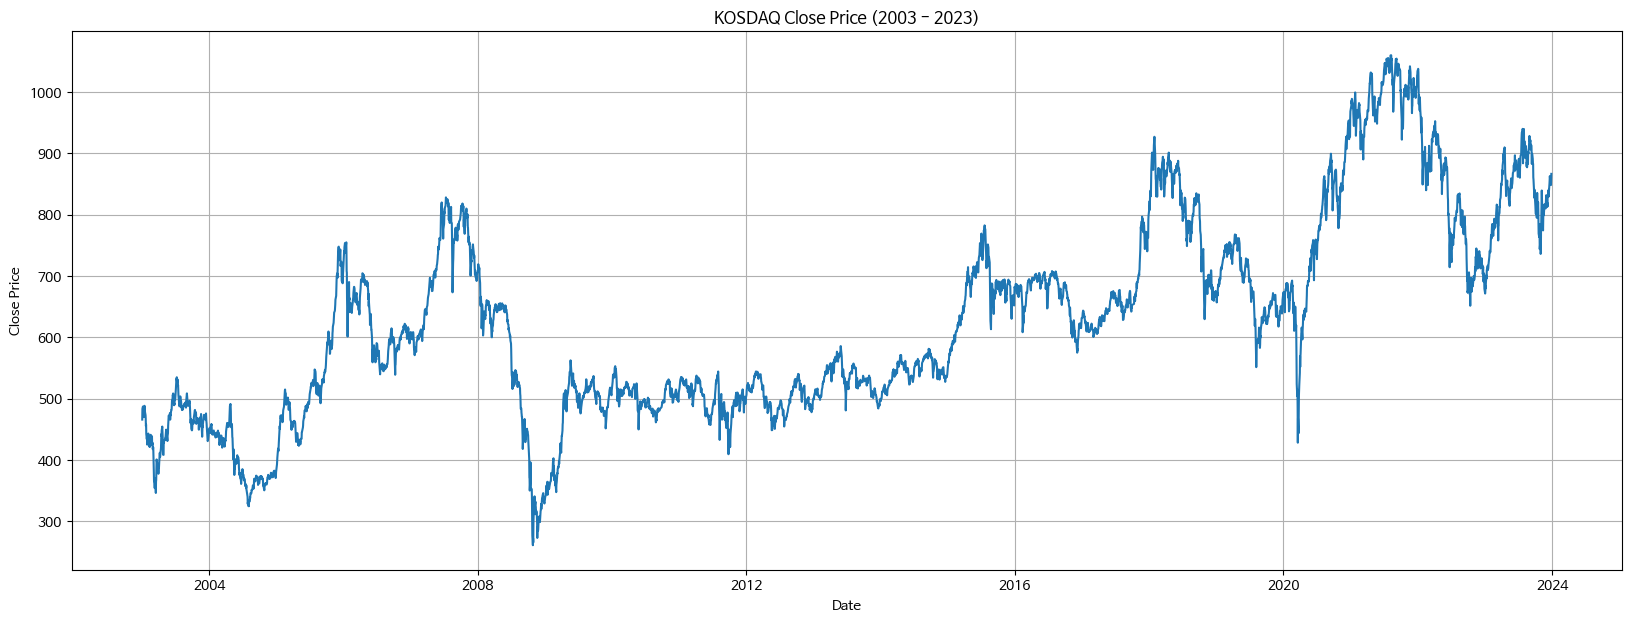

In [83]:
# 코스닥 종가 데이터 시각화
plt.figure(figsize=(20, 7))  # 그래프 크기 설정
plt.plot(kosdaq_close)       # 코스닥 종가 데이터 플롯
plt.title('KOSDAQ Close Price (2003 - 2023)')  # 그래프 제목 설정
plt.xlabel('Date')           # x축 레이블 설정
plt.ylabel('Close Price')    # y축 레이블 설정
plt.grid(True)
plt.show()                   # 그래프 보여주기

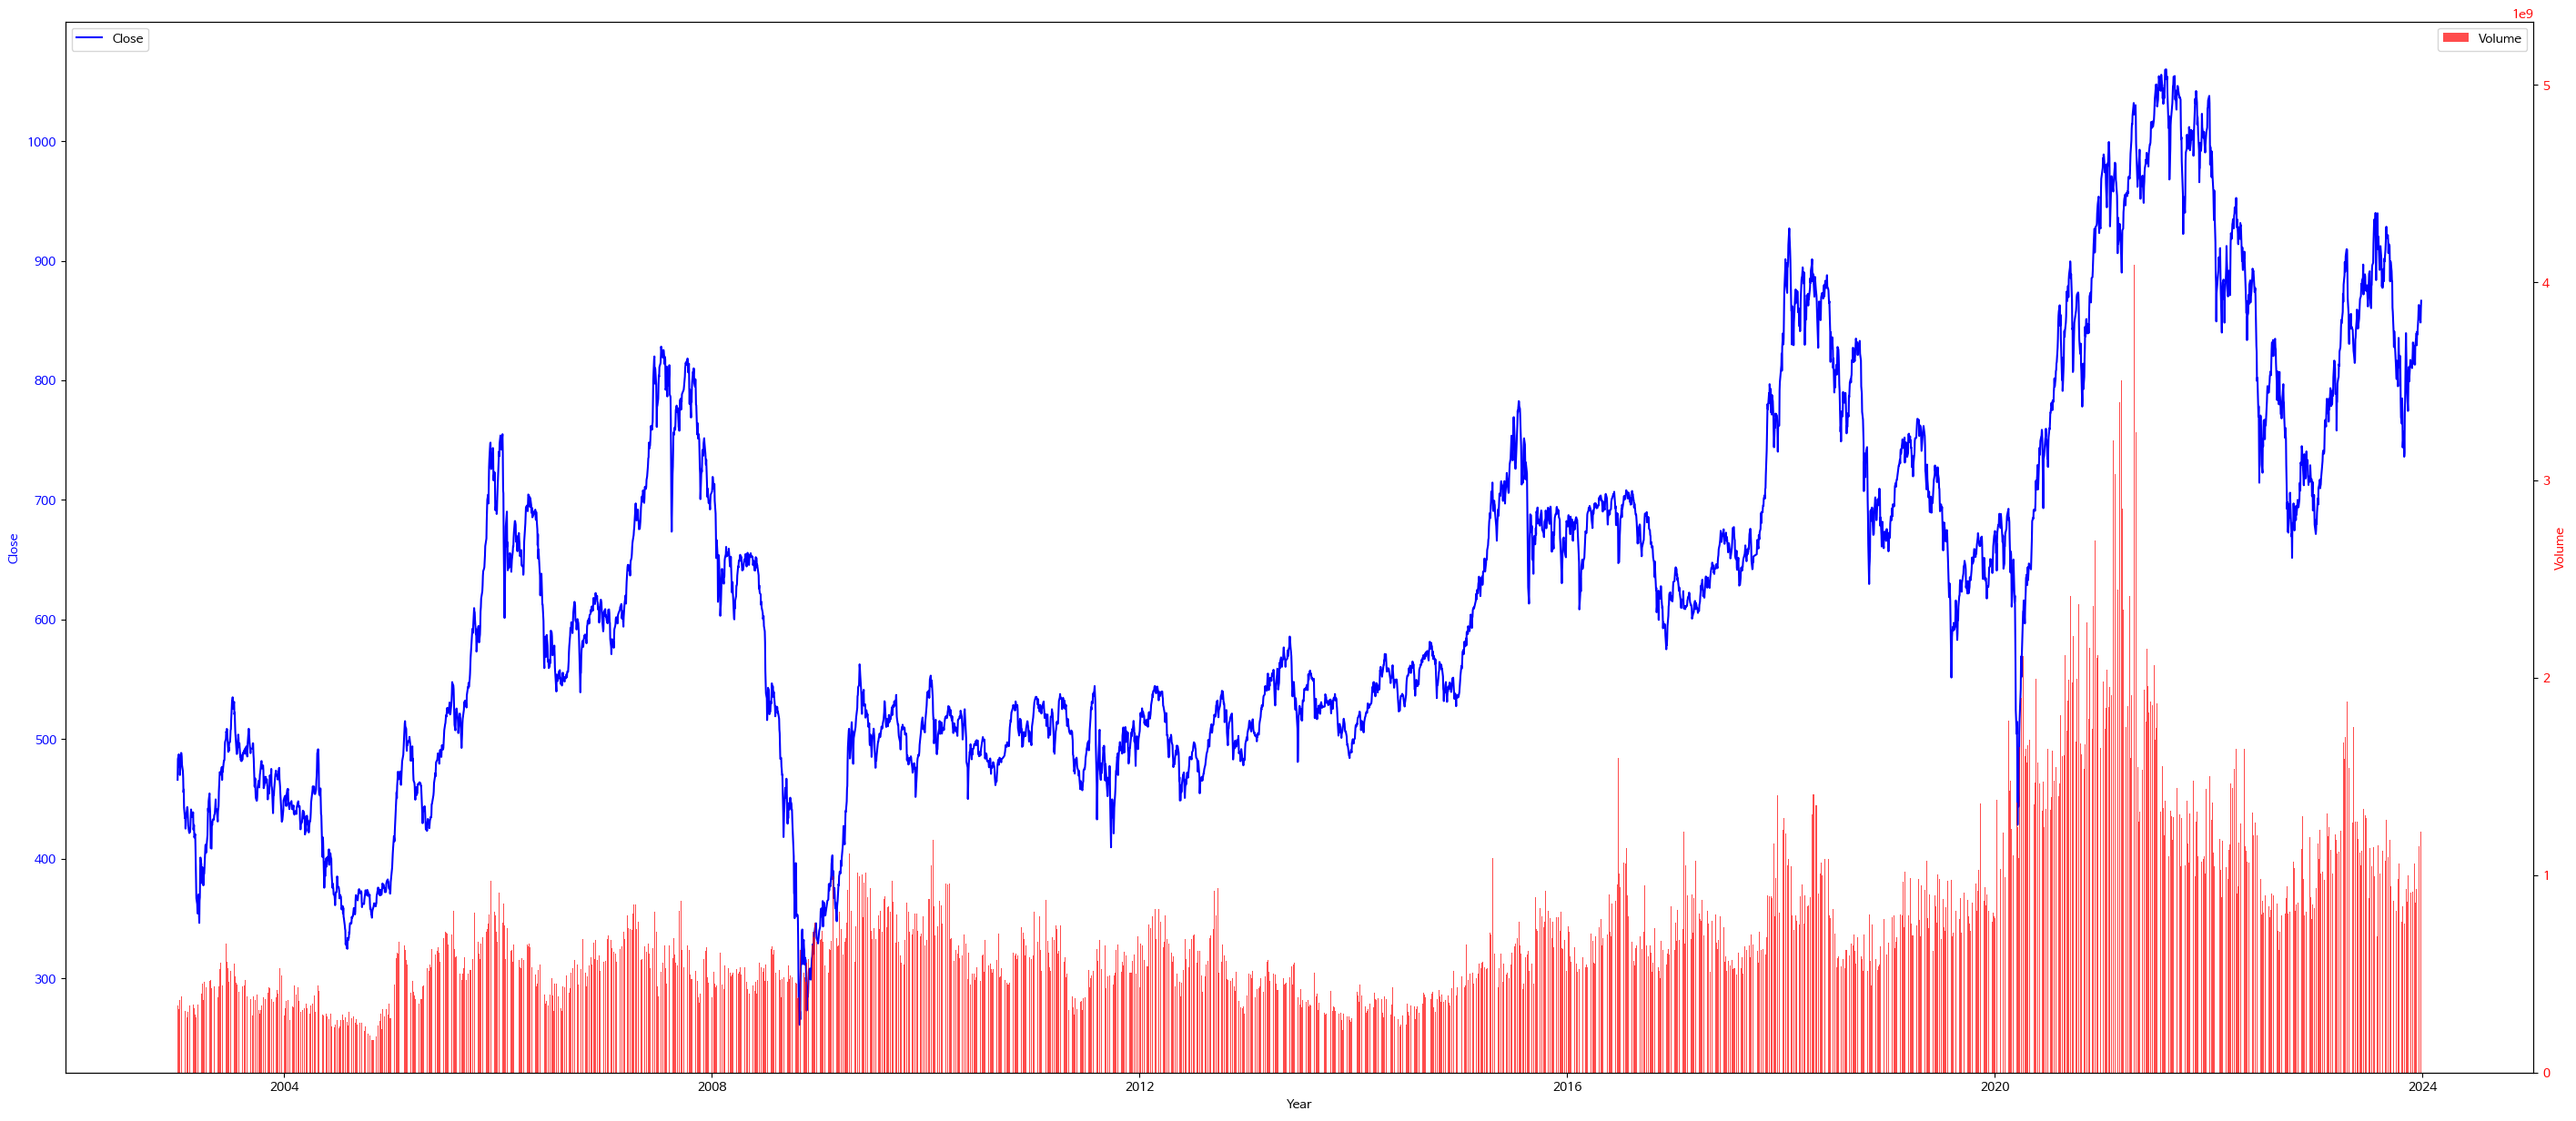

In [84]:
# 시각화 설정
plt.figure(figsize=(35, 15))

# 종가 데이터에 대한 선 그래프
plt.plot(kosdaq_close, color='blue', label='Close')
plt.xlabel('Year')
plt.ylabel('Close', color='blue')
plt.tick_params(axis='y', labelcolor='blue')
plt.legend(loc='upper left')

# 거래량 데이터에 대한 막대 그래프
plt.twinx()  # 새로운 y축 생성
plt.bar(kosdaq_data.index, kosdaq_volume, color='red', alpha=0.7, label='Volume')
plt.ylabel('Volume', color='red')
plt.tick_params(axis='y', labelcolor='red')
plt.legend(loc='upper right')

plt.show()

코스피, 코스닥을 합치기

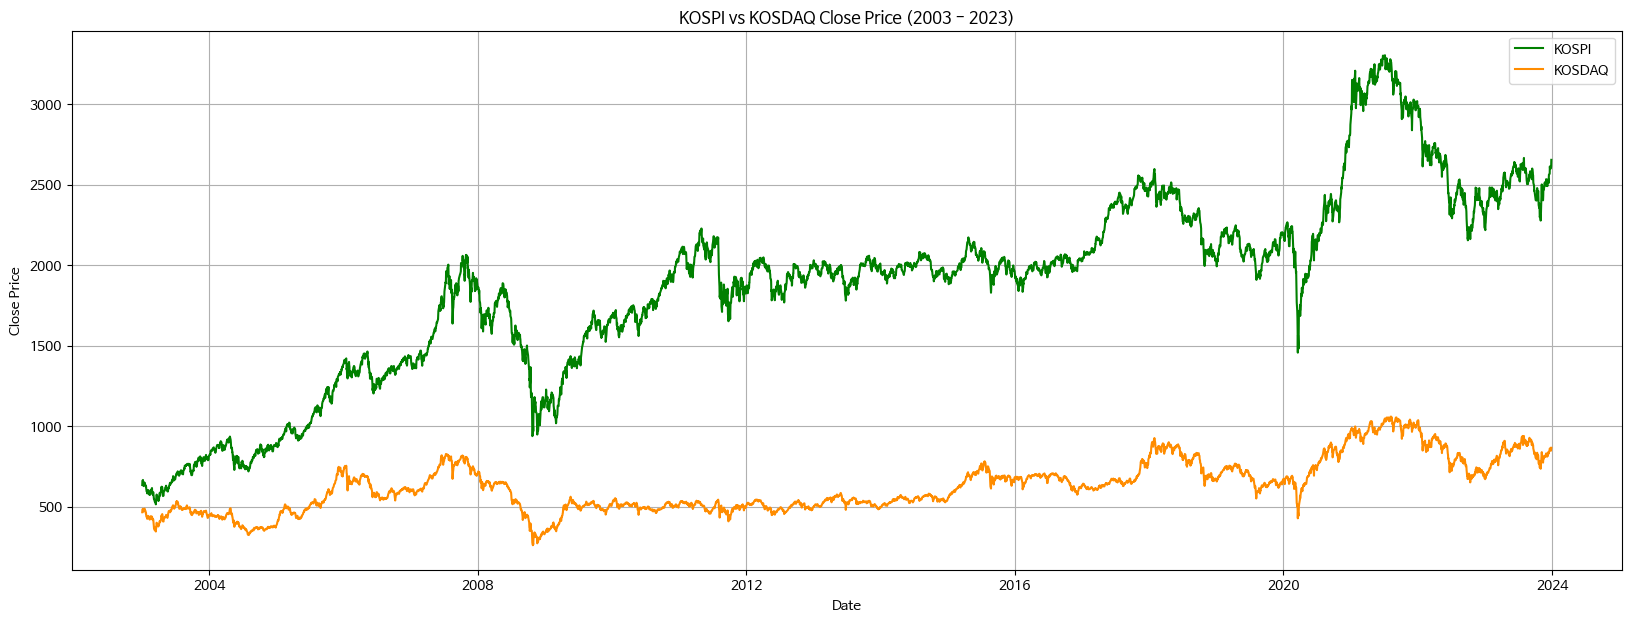

In [85]:
plt.figure(figsize=(20, 7))  # 그래프 크기 설정

# 코스피 종가 데이터 플롯, 색상을 파란색으로 설정
plt.plot(kospi_close, label='KOSPI', color='green')

# 코스닥 종가 데이터 플롯, 색상을 빨간색으로 설정
plt.plot(kosdaq_close, label='KOSDAQ', color='darkorange')

# 그래프 제목, 레이블 설정
plt.title('KOSPI vs KOSDAQ Close Price (2003 - 2023)')
plt.xlabel('Date')
plt.ylabel('Close Price')

# 그리드와 레전드 추가
plt.grid(True)
plt.legend()

# 그래프 보여주기
plt.show()